In [1]:
from oppenant_analysis.oppenent_analysis import *

player_name = "Memetits"
map_select = "de_inferno"
premade = []

match_recuperation_dict_txt(api_key="38b28095-4ca6-48b6-aec5-748f507d5fcf",
                            player_id="57c4c556-3b8e-4695-bf55-122dde5040db", starting_item_position_call=0,
                            return_items_call=3 , map_select=map_select, nickname = player_name, premade = premade,replace = True )

Memetits  :  7d2e14eb-e4eb-43cc-8bc8-1f6b8168bf4b
##ALL file removed in  C:/demo_csgo/DataBase/de_inferno ###
_______________START DOWNLOADING MATCH NUMBER : 1 on map : de_dust2 ___SUCCEED BEFORE :  0
wrong map:  de_dust2 vs de_inferno
_______________START DOWNLOADING MATCH NUMBER : 2 on map : de_inferno ___SUCCEED BEFORE :  0
Check premade : 
1-a983f4da-5917-4e6c-8793-934c06ea7333
https://demos-europe-west2.faceit-cdn.net/csgo/1-a983f4da-5917-4e6c-8793-934c06ea7333-1-1.dem.gz
C:/demo_csgo/DataBase/de_inferno_1663185079.dem.7z
patool: Extracting C:/demo_csgo/DataBase/de_inferno_1663185079.dem.7z ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -oC:/demo_csgo/DataBase -- C:/demo_csgo/DataBase/de_inferno_1663185079.dem.7z
patool: ... C:/demo_csgo/DataBase/de_inferno_1663185079.dem.7z extracted to `C:/demo_csgo/DataBase'.
debut du parse
parse success
de_inferno_1663185079_1-a983f4da-5917-4e6c-8793-934c06ea7333
_______________START DOWNLOADING MATCH NUMBER : 1 on map : de_mirage ___SU

SIDE = T, map: de_inferno team : Memetits


23:07:23 [INFO] NumExpr defaulting to 4 threads.


<Figure size 432x288 with 0 Axes>

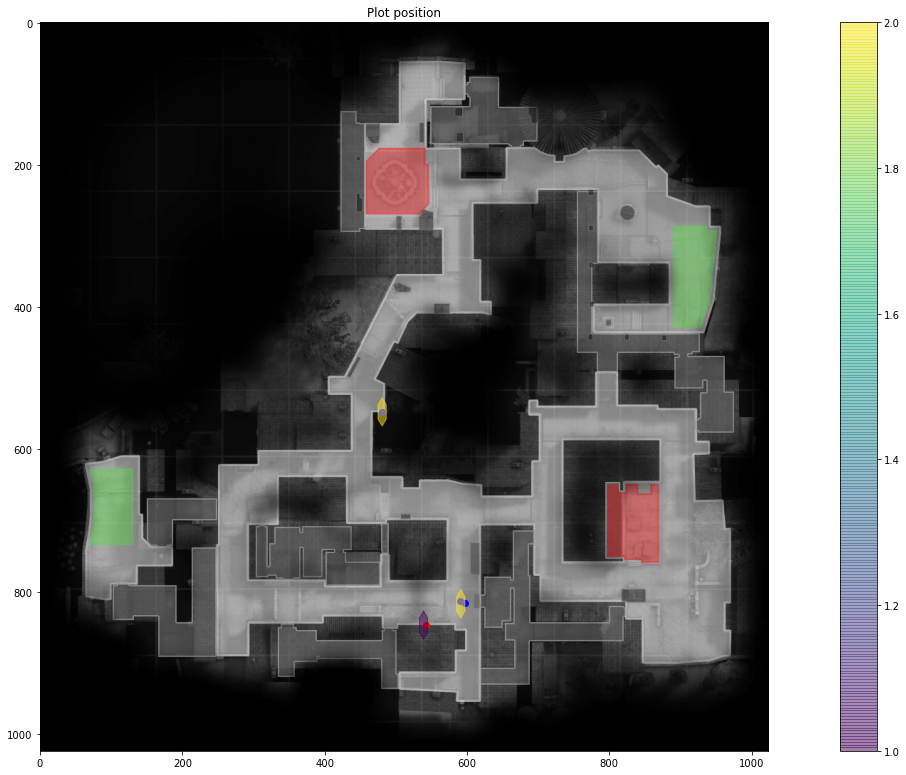

In [2]:
from oppenant_analysis.oppenent_analysis import *
player_name = "Memetits"
map_select = "de_inferno"
print("SIDE = T, map:",map_select,"team :",player_name)
df = gunround_analysis(player_name,map_select,side = 't')

In [3]:
df

,SecondMid,TRamp,Apartments,BackAlley,prob
0,1,1.0,2.0,1.0,0.2
1,2,1.0,1.0,1.0,0.2
2,3,0.0,1.0,1.0,0.2
3,4,1.0,0.0,0.0,0.4


SIDE = CT, map: de_inferno team : BEBOOOL


<Figure size 432x288 with 0 Axes>

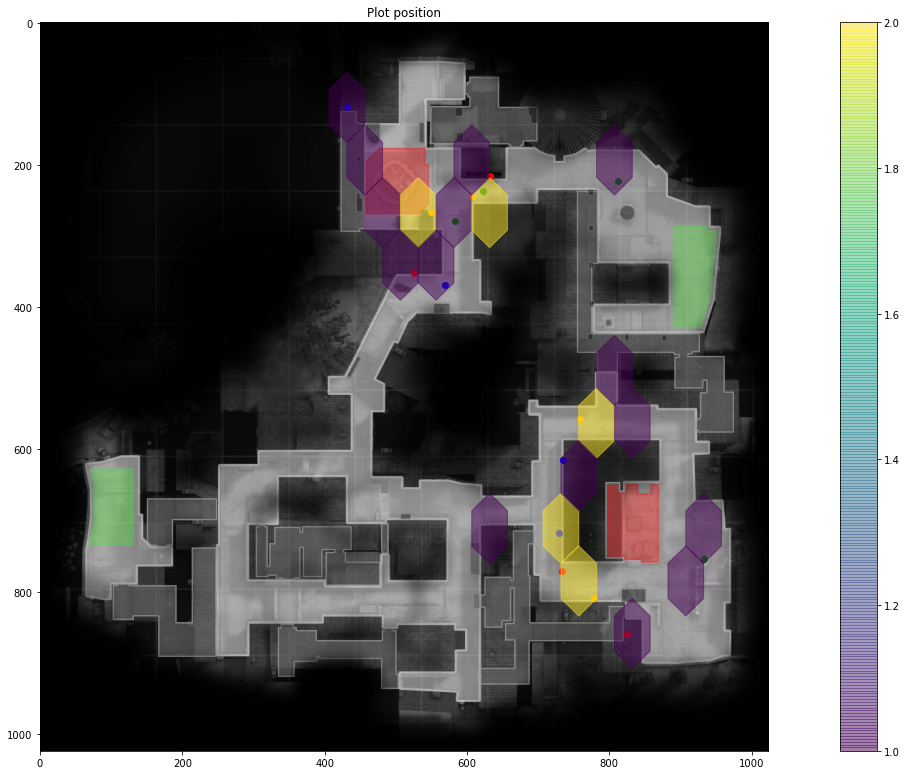

In [3]:
print("SIDE = CT, map:",map_select,"team :",player_name)
df = gunround_analysis(player_name,map_select, side = 'ct')

In [4]:
df

,Middle,TopofMid,BombsiteB,Arch,BombsiteA,Apartments,Banana,CTSpawn,Ruins,prob
0,0.0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.2
1,0.0,1,2,0.0,2.0,0.0,0.0,0.0,0.0,0.2
2,0.0,1,2,1.0,1.0,0.0,0.0,0.0,0.0,0.2
3,0.0,2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.2
4,1.0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.2
